In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Импортируем модуль датасета CIFAR10
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
# Выгрузим тренировочные и тестовые данные при помощи метода load_data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
# one hot encode target values
train_labesl = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
import matplotlib.pyplot as plt
import numpy as np

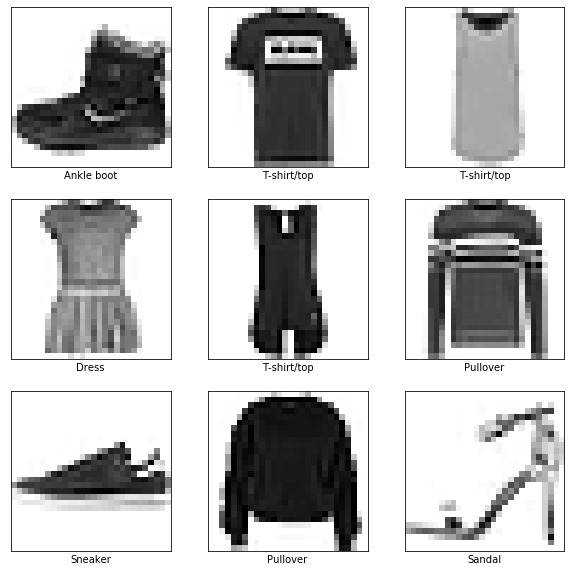

In [9]:
plt.figure(figsize=(10,10))

#выведем первые 10 элементов тренировочной сети, подпишем классы к которым они принадлежат
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [11]:
def define_model():
    
    # Создаем пустую модель
    model = Sequential()

    #VGG1-блок
    # Начинаем со сверточных слоя, указывая тип активации на выходе из него,
    # способ заполнения краев (padding) и способ инициализации весов
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    # Здесь мы используем метод MaxPooling, который уменьшает размер обрабатываемого изображения, 
    # выбирая из 4 пикселей 1 с максимальным значением, чтобы это быстрее считалось. (2,2) -> 1
    model.add(MaxPooling2D((2, 2)))

    # Слой dropout, который на каждом шаге "выключает" 20% случайно выбранных нейронов
    model.add(Dropout(0.2))

#VGG2-блок
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

  # Разворачиваем данные в вектор
    model.add(Flatten())
  # Добавляем полносвязные слои:
  # ReLU активация скрытого слоя
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
  # Знакомый нам softmax для выходного полносвязного слоя
    model.add(Dense(10, activation='softmax'))

  # Компилируем модель с функцией ошибки categorical crossentropy, оптимизатором Адам 
  # (оптимизатор, который со стандартным набором параметров может обучить эффективную
  # нейросеть), и метрикой - количеством правильно угаданных картинок.
    model.compile(loss='categorical_crossentropy',optimizer = 'nadam',metrics = ['accuracy'])
    return model

In [12]:
# При помощи функции define_model строим последовательную сверточную нейросеть
base_model = define_model()

In [13]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [17]:
history_cnn=base_model.fit(train_images, train_labels, epochs=50)
 #= base_model.fit(train_images, train_labels,batch_size=10, epochs=30,validation_data=(test_images, test_labels), shuffle=True)

Epoch 1/50


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 28, 28]


In [30]:
#@title Текст заголовка по умолчанию
def plot_history(history_cnn):
  
  plt.plot(history_cnn.history['val_accuracy'], '-o', label='validation accuracy')
  plt.plot(history_cnn.history['accuracy'], '--s', label='training accuracy')
  plt.xlabel('Количество эпох')
  plt.ylabel('Точность')
  plt.legend();

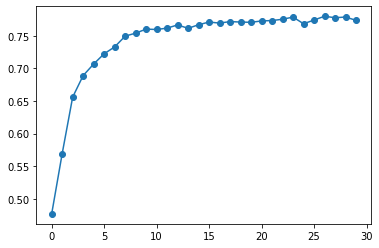

In [35]:
# Построим графики точности на валидационной (val_acc) и трейновой (acc) выборках
# в конце каждой эпохи обучения
plt.plot(history_cnn.history['val_acc'], '-o', label='validation accuracy')
 

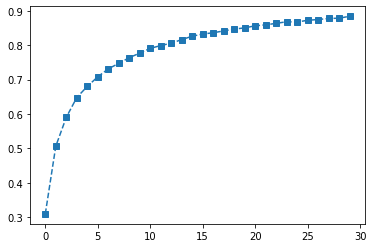

In [36]:
plt.plot(history_cnn.history['acc'], '--s', label='training accuracy')

Точность на валидационной выборке (синяя линия) быстро сбавляет скорость роста и уступает точности на тренировочном датасете (оранжевая линия), так что мы немного переобучаемся, несмотря на слои **Dropout**.


Посмотрим на результаты классификации.

In [40]:
# Выведем метрики качества нашей нейросети (функцию ошибки и точность)
# для тестовой выборки

base_model.evaluate(X_test, y_test)

[0.763388883638382, 0.7735]

## 2) Переобучение. Аугментация данных

Еще один способ решения проблемы переобучения сети —  аугментация ("дополнение") тренировочного датасета без привлечения реальных новых картинок.
 
Попробуем изменять наши исходные картинки перед тем, как они попадут в сетку при помощи различных трансформаций.

Конечно, можно было бы поштучно изменить каждую картинку, сохранить, как новый датасет и тренировать модель уже на нем.

Но это дает меньшую вариативность преобразований, занимает много места и памяти. Чтобы не изменять каждую картинку вручную, используют генераторы.

Создадим такой генератор на основе наших данных при помощи модуля из `keras` библиотеки `ImageDataGenerator`.

### 4. Генератор батчей с трансформацией

In [41]:
# Импортируем нужный нам модель генератора
from keras.preprocessing.image import ImageDataGenerator

Создадим модуль ImageDataGenerator.

В качестве параметров укажем, какие изменения для картинок будем использовать.

В данном случае:

**width_shift_range**=0.1 - случайный сдвиг изображение по горизонтали на 0.1 ширины;

**height_shift_range**=0.1 - случайный сдвиг изображение по вертикали на 0.1 высоты;

**horizontal_flip**=True - случайно отражает картинку по горизонтали

Таким образом, мы увеличиваем наш датасет, давая нейросети большую вариативность входных данных.

In [42]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

Применим полученные трансформации к нашим исходным данным.


Обратите внимание, что размер батча **batch_size** нужно указать здесь, чтобы генератор знал, 
сколько картинок ему выдавать модели при обучении.

Теперь при обращении к `train_generator` мы сможем получать измененные изображения.

При помощи метода `flow` получим генератор, связанный с нашими данными

In [43]:
train_generator = datagen.flow(X_train, y_train, batch_size=128)

`train_generator` является итератором, т.е., чтобы получить батч элементов
нужно выполнить какую-то итерирующую функцию: например, цикл `for`.

In [44]:
for img in train_generator:
  img=img[0]
  break

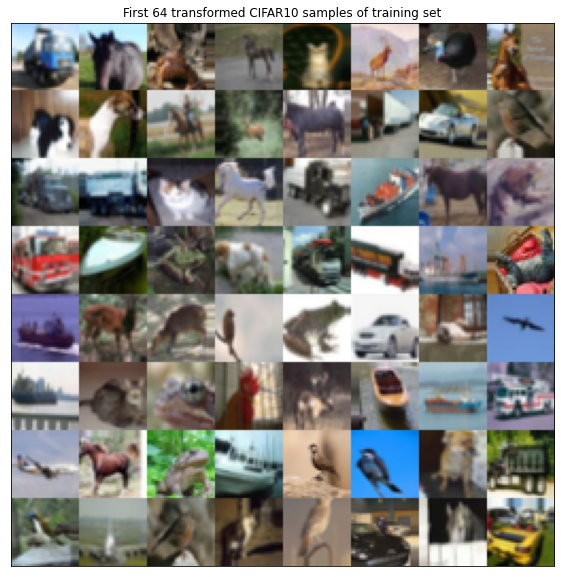

In [45]:
# Построим 8х8 трансформированных элементов нашего датасета
# при помощи функции plot_dataset_samples_grid

plot_dataset_samples_grid(img, dataset_name='transformed CIFAR10', N=8)

Вызовем функцию define_model, объявленную выше, которая создает модель нейросети из двух **VGG** блоков

In [46]:
# Определим новую модель
gen_model = define_model()

In [48]:
#  Обучим модель с данными из генератора при помощи .fit_generator,

# На выходе все так же мы получим натренированную модель и структуру history_cnn, 
# из которой можно достать значения функции ошибки и метрик качества на обеих выборках
history_cnn = gen_model.fit_generator(train_generator,
                        epochs=20,
                        validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 33s 85ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.4432 - acc: 0.4754 - val_loss: 1.1588 - val_acc: 0.5786
Epoch 2/20
391/391 [==============================] - 33s 83ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.2424 - acc: 0.5551 - val_loss: 1.0412 - val_acc: 0.6367
Epoch 3/20
391/391 [==============================] - 33s 83ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.1226 - acc: 0.6019 - val_loss: 0.9827 - val_acc: 0.6532
Epoch 4/20
391/391 [==============================] - 32s 83ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.0436 - acc: 0.6293 - val_loss: 0.8378 - val_acc: 0.7109
Epoch 5/20
391/391 [==============================] - 32s 83ms/step - batch: 195.0000 - size: 127.8772 - loss: 0.9849 - acc: 0.6531 - val_loss: 0.8695 - val_acc: 0.7000
Epoch 6/20
391/391 [==============================] - 33s 84ms/step - batch: 195.0000 - size: 127.8772 - loss: 0.9436 - acc: 0.6695 - val_loss: 0.7998 - va

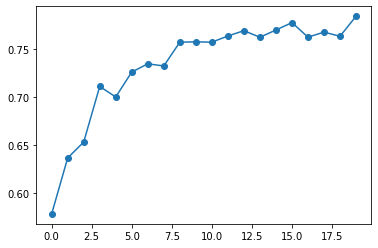

In [50]:
# Посмотрим на изменение точности на валидационной (val_acc) и трейновой (acc) выборках
# с каждой эпохой
plt.plot(history_cnn.history['val_acc'], '-o', label='validation accuracy')


Видно, что точность на валидационной выборке еще не вышла на "плато", а модель не успела переобучиться, значит, при увеличении числа эпох тренировки мы сможем еще увеличить нашу точность на валидационном наборе данных.

Ай да аугментация!

In [ ]:
gen_model.evaluate(X_test, y_test)

In [ ]:

history_cnn = gen_model.fit_generator(train_generator,
                        epochs=100,
                        validation_data=(X_test, y_test))


In [ ]:
pplt.plot(history_cnn.history['val_acc'], '-o', label='validation accuracy')


### Вывод

Аугментация тренировочной выборки положительно влияет на обобщающую способность сети, позволяя нейросети улавливать свойства целого класса, а не небольшой выборки тренировочных данных.

## 4) Cats vs Dogs



Теперь мы поработаем с датасетом, который не входит в набор стандартных датасетов библиотеки Keras, поэтому данные придется загружать из внешнего источника.

Загрузим датасет для бинарной классификации кошек и собак. Попробуем заставить нашу сеть ответить на вопрос: это кошки или собаки?




<table>
<tr>
<td>
<img src="https://preview.redd.it/4j8gx4ztzex01.png?width=960&crop=smart&auto=webp&s=5e80ab0071d56cc042f7b709648de8cde394832a" width="200">
</td>
<td>
</td>
</tr>
<tr>
<td>
<img src="https://cdn.images.express.co.uk/img/dynamic/128/590x/secondary/Viral-cat-sensation-715546.jpg" width="200">
</td>
<td>
<img src="https://www.sunnyskyz.com/uploads/2016/12/hmm9j-dog-or-cat-2.jpg" width="200">
</td>
</tr>
</table>



In [51]:
# Импортируем функцию для загрузки картинок из файлов и генератор картинок
from keras.preprocessing.image import load_img, ImageDataGenerator

#### 1. Загрузка данных

In [52]:
!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

--2020-10-27 09:26:36--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.244.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.244.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  16.6MB/s    in 36s     

2020-10-27 09:27:13 (15.5 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



Теперь наши данные хранятся в папке `Cat_Dog_data` с разделением на поддиректории `train` и `test`.

Элементы каждого класса хранятся в своей директории (`cat` или `dog`). 

In [53]:
base_dir = 'Cat_Dog_data'

train_dir = os.path.join(base_dir, 'train')

test_dir = os.path.join(base_dir, 'test')

In [54]:
# Посмотрим, как именно расположены директории с датасетом относительно друг друга
tree(base_dir,print_files=False)

Cat_Dog_data/
|  test/
|  |  dog/
|  |  cat/
|  train/
|  |  dog/
|  |  cat/


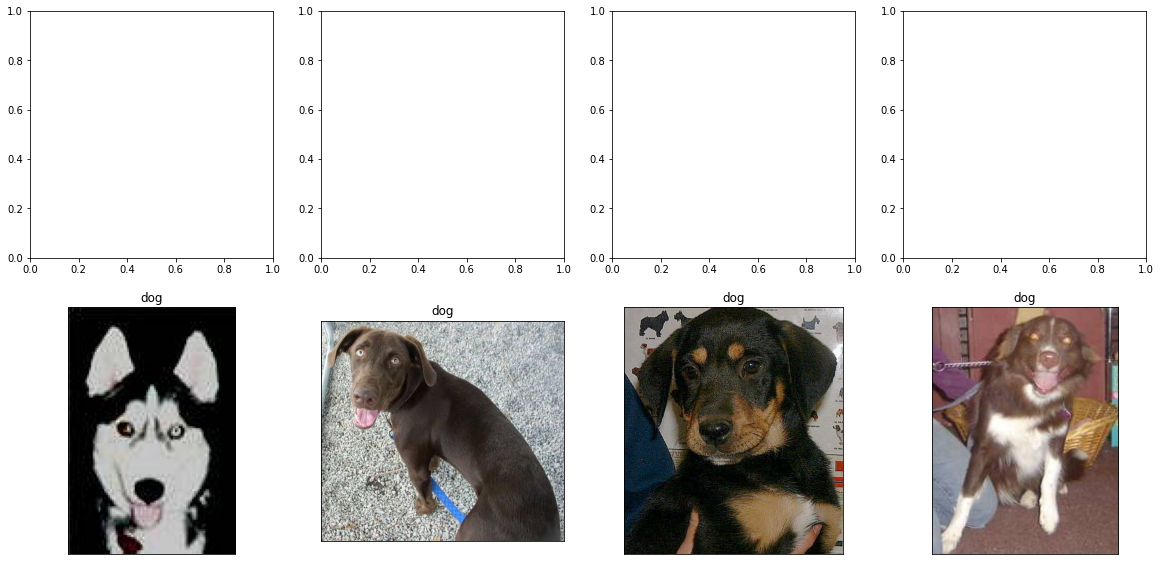

In [55]:
#Посмотрим на содержание датасета при помощи функции plot_cats_dogs_samples
plot_cats_dogs_samples(train_dir, N=4)

### 2. Подготовка данных 


Такой формат хранения удобен для использования функции генератора изображений `flow_from_directory`. 

Генератор не будет выкачивать все данные в оперативную память, а будет поочередно считывать из директорий нужные изображения и складывать их в батчи.

Создадим `ImageDataGenerator` для трейновой и тестовой выборок, поскольку обе выборки нужно доставать из директорий.

Укажем преобразование, нормализующее изображения 

In [56]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Зададим поток тренировочных батчей из директории **train** и **test**;

Приведем все изображения к одному квадратному формату;

Укажем, что работаем с задачей бинарной классификации

In [57]:
#Теперь для создания генератора вместо метода flow мы польщуемся 
# flow_from_directory

train_generator = train_datagen.flow_from_directory(
        train_dir,  # Путь к директории с трейновой выборкой
        target_size=(150, 150),  # Размер изображений, к которому нужно привести все данные
        batch_size=128,
        #Генератор автоматически расставит бинарные лейблы для классов cat и dog
        class_mode='binary')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [58]:
# Соотношение между номером класса и его называнием запишем в словарь
LABEL_DICT={1:'dog',0:'cat'}

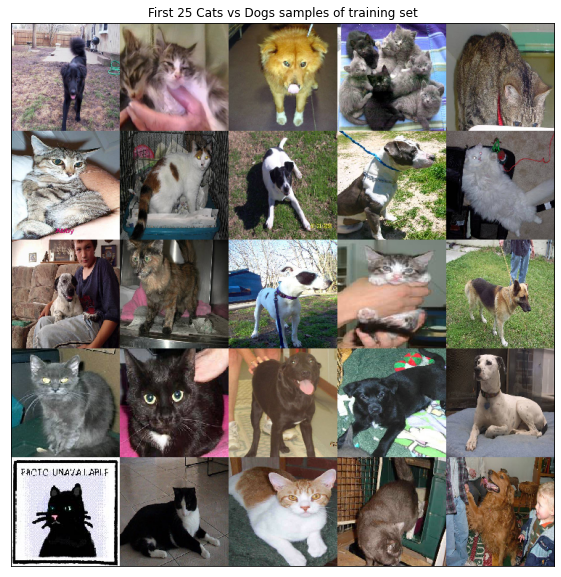

In [59]:
# train_generator является итератором, т.е., чтобы получить батч элементов
# нужно выполнить какую-то итерирующую функцию: например, цикл for
for img in train_generator:
  img=img[0]
  break

#Посмотрим, какие у нас вышли картинки при помощи функции plot_dataset_samples_grid
plot_dataset_samples_grid(img,'Cats vs Dogs', N=5)

### 3. Baseline
Для сравнения построим небольшую  baseline сверточную модель, состоящую из трех блоков **conv-maxpool** и пары полносвязных слоев.



Размер входящего изображения `input_shape`=($150$, $150$, $3$), активация последнего слоя - `sigmoid` вместо `softmax`, поскольку мы работаем со случаем бинарной классификации. На выходе мы получим вероятность от $0$ до $1$, что картинка принадлежит к классу $1$ (**dog**).


In [60]:
def define_model():
  # Создаем пустую модель
  model = Sequential()

#1й сверточный блок
  # Начинаем со сверточных слоя, указывая тип активации ReLU
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  # Здесь мы используем метод MaxPooling, который уменьшает размер обрабатываемого изображения, 
  # выбирая из 4 пикселей 1 с максимальным значением, чтобы это быстрее считалось. (2,2) -> 1
  model.add(MaxPooling2D((2, 2)))

#2й сверточный блок
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

#3й сверточный блок
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  # Разворачиваем данные в вектор
  model.add(Flatten())
  # Добавляем полносвязные слои:
  # ReLU активация скрытого слоя
  model.add(Dense(512, activation='relu'))
  # Sigmoid в качестве активации и одна выходная переменная - 
  # вероятность, что картинка принадлежит к классу 1
  model.add(Dense(1, activation='sigmoid'))


  # Компилируем модель с функцией ошибки binary crossentropy, оптимизатором Адам 
  # (оптимизатор, который со стандартным набором параметров может обучить эффективную
  # нейросеть), и метрикой - количеством правильно угаданных картинок.
  model.compile(loss='binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
  return model

In [61]:
# Создаем новую модель
base_model = define_model()

In [62]:
#Посмотрим, из чего наша модель состоит
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [63]:
history = base_model.fit_generator(
      train_generator,
      epochs=7,
      validation_data=test_generator)

Epoch 1/7
176/176 [==============================] - 79s 448ms/step - batch: 87.5000 - size: 127.8409 - loss: 0.6409 - acc: 0.6533 - val_loss: 0.5439 - val_acc: 0.7292
Epoch 2/7
176/176 [==============================] - 74s 422ms/step - batch: 87.5000 - size: 127.8409 - loss: 0.4838 - acc: 0.7652 - val_loss: 0.5038 - val_acc: 0.7460
Epoch 3/7
176/176 [==============================] - 74s 418ms/step - batch: 87.5000 - size: 127.8409 - loss: 0.4144 - acc: 0.8111 - val_loss: 0.4789 - val_acc: 0.7760
Epoch 4/7
176/176 [==============================] - 75s 427ms/step - batch: 87.5000 - size: 127.8409 - loss: 0.3599 - acc: 0.8405 - val_loss: 0.4302 - val_acc: 0.8084
Epoch 5/7
176/176 [==============================] - 75s 428ms/step - batch: 87.5000 - size: 127.8409 - loss: 0.3077 - acc: 0.8661 - val_loss: 0.4822 - val_acc: 0.7864
Epoch 6/7
176/176 [==============================] - 76s 429ms/step - batch: 87.5000 - size: 127.8409 - loss: 0.2571 - acc: 0.8909 - val_loss: 0.4190 - val_acc:

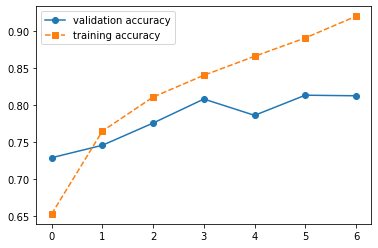

In [66]:
# Построим изменение точности на трейновой (оранжевая линия) и тестовой (синяя линия) 
# выборках
plt.plot(history.history['val_acc'], '-o', label='validation accuracy')
plt.plot(history.history['acc'], '--s', label='training accuracy')
plt.legend();

In [67]:
# Взглянем на итоговые результаты классификации на тестовой выборке 
# (функция ошибки, точность)
base_model.evaluate(test_generator)

[0.4728375166654587, 0.8128]

Видно, что точность на тестовой выборке практически сразу вышла на плато около $0.8$, а точность на трейновой выборке почти достигла $1$, поэтому с такой моделью улучшить точность на новых данных уже вряд ли выйдет. 

Будем пробовать улучшать показатели радикальными способами, но сначала посмотрим, что эта сеть думает по поводу зоопарка из описания датасета.

### 4. Evaluation на особенных картинках

Посмотрим, что скажет нейросеть по поводу наших особенных картинок

In [68]:
# Загрузим картинки из описания задачи при помощи функции load_special_images()
im1, im2, im3 = load_special_images()

Изменим размер картинок на размер входных данных нейросети ($150$х$150$).

Добавим дополнительную размерность, поскольку сеть принимает картинки с еще одной размерностью батча. 

Все это делаем при помощи функции `image_to_batch`

In [69]:
im1_150 = image_to_batch(im1, 150)
im2_150 = image_to_batch(im2, 150)
im3_150 = image_to_batch(im3, 150)

In [70]:
im1_150.shape

(1, 150, 150, 3)

In [71]:
im1_150.max()

255

Заметим, что прежде, чем подавать картинки в нейросеть их нужно не забыть **отнормировать**!

In [72]:
im1_150 = im1_150/255.
im2_150 = im2_150/255.
im3_150 = im3_150/255.

Получим вероятности, что на картинках собаки, используя метод `predict`
нашей модели `base_model`

In [73]:
pred1 = base_model.predict(im1_150)
pred2 = base_model.predict(im2_150)
pred3 = base_model.predict(im3_150)

In [74]:
pred3

array([[0.97402394]], dtype=float32)

Посмотрим, для какой картинки какое предсказание дала нейросеть
при помощи функции `plot_special_images`

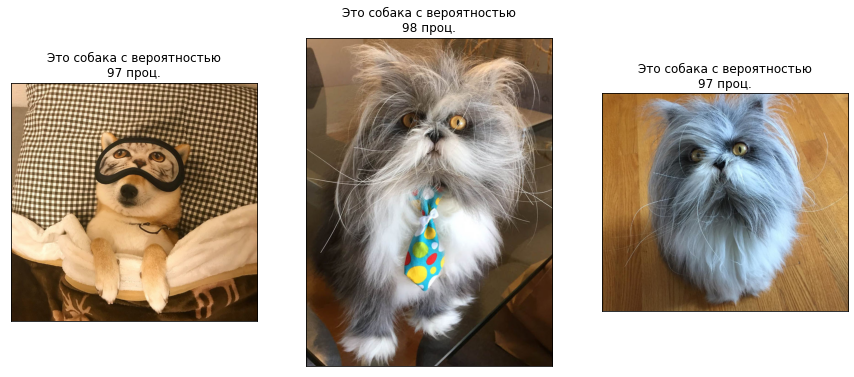

In [75]:
plot_special_images(pred1,pred2,pred3)

## 5. Transfer learning

Использование предобученных моделей для новых задач

Как уже упоминалось ранее, есть архитектуры нейросетей, которые зарекомендовали себя в решении определенного класса задач, как, например, **VGG16**.

<img src="https://www.researchgate.net/profile/Max_Ferguson/publication/322512435/figure/download/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png" width="700">


**VGG16** и подобные ей модели содержат большое количество параметров и обучение их с нуля может занять большое количество времени. 

Кроме того, бывают задачи, где данных изначально небольшое количество и даже аугментация не сильно спасает положение, тогда обучение сверточной сети может не быть очень успешным.

Поэтому можно использовать модель, которая уже была кем-то предобучена, загрузить ее веса и дообучать только последние слои, подстраивая их под свою конкретную задачу! 

#### План работы:

1.   Загрузить предобученную VGG16 модель без последних полносвязных слоев, отвечающих за конкретную задачу
2.   Построить свою полносвязную сеть для бинарной классификации кошек и собак
3.   Соединить две модели в одну!



### 1) Подготовим данные

Создадим `ImageDataGenerator` для трейновой и тестовой выборок,
указав преобразование, нормализующее изображения

In [76]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Изменим размеры картинок dataloader, поскольку модель **VGG16** принимает входные значения стандартизированного размера $224$х$224$x$3$.

Зададим поток тренировочных батчей из директории **train** и **test**.

Приведем все изображения к одному квадратному формату.

Укажем, что работаем с задачей бинарной классификации.

In [77]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Путь к директории с трейновой выборкой
        target_size=(224, 224),  # Размер изображений, к которому нужно привести все данные
        batch_size=128,
        #Генератор автоматически расставит бинарные лейблы для классов cat и dog
        class_mode='binary')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=128,
        class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


### 2) Загрузим VGG16

В библиотеке `Keras` уже представлены архитектуры **State-of-the-art** моделей, поэтому можно достать **VGG16** модель одной строчкой кода.

In [78]:
from keras.applications import vgg16 as vgg

Создадим **VGG** модель, в качестве параметра `weights` укажем `imagenet` - название
большого датасета с картинками, на котором сеть была натренирована;

`include_top` - False - не включать полносвязные слои вверху нейросети

In [79]:
vgg_model = vgg.VGG16(weights='imagenet', 
                       include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [80]:
#Посмотрим, из чего состоит VGG модель
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

Достанем последний слой `block5_pool` из **VGG** модели.

Сверху него мы далее построим наш классификатор.

In [81]:
last = vgg_model.get_layer('block5_pool').output

### 3) Добавим небольшую нейросеть для бинарной классификации

In [82]:
# Модуль, с помощью которого мы будем "сшивать" последовательные модели
from keras.engine import Model
# Импортируем Pooling по всему слою входных данных и нормализацию батчей
from keras.layers import GlobalAveragePooling2D, BatchNormalization

Добавим сверху слоя `last` **VGG** модели свои слои для классификации

In [83]:
# Добавим новые GAP (вместо FLatten) и BatchNormalization слои
x = GlobalAveragePooling2D()(last)
x = BatchNormalization()(x)

# Привычные полносвязные слои
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(1, activation='sigmoid')(x)

Объединим **VGG16** и **классификатор** в одного трансформера при помощи модуля `Model`

In [84]:
fin_model = Model(vgg_model.input, pred)

Теперь самое важное: нам не нужно изменять и так хорошо натренированные веса
исходной модели, поэтому мы **"замораживаем"** их, при тренировке они будут использоваться
только для вычисления выходных данных

In [85]:
for layer in vgg_model.layers:
     layer.trainable = False

In [86]:
# Скомпилируем модель с функцией ошибки binary crossentropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
# нейросеть), и метрикой - количеством правильно угаданных картинок.
fin_model.compile(loss='binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

In [87]:
fin_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [ ]:
# Поставим модель обучаться 5 эпох при помощи модуля fit_generator
history_cnn = fin_model.fit_generator(train_generator,
              epochs=5,
              validation_data=test_generator,
              shuffle=True)

Epoch 1/5
176/176 [==============================] - 197s 1s/step - batch: 87.5000 - size: 127.8409 - loss: 0.2404 - acc: 0.8957 - val_loss: 0.3459 - val_acc: 0.9112
Epoch 2/5
176/176 [==============================] - 183s 1s/step - batch: 87.5000 - size: 127.8409 - loss: 0.1616 - acc: 0.9340 - val_loss: 0.1940 - val_acc: 0.9216
Epoch 3/5
 80/176 [============>.................] - ETA: 1:28 - batch: 39.5000 - size: 127.6500 - loss: 0.1433 - acc: 0.9432

In [ ]:
plt.plot(history_cnn.history['val_accuracy'], '-o', label='validation accuracy')
plt.plot(history_cnn.history['accuracy'], '--s', label='training accuracy')
plt.legend();

In [ ]:
fin_model.evaluate(test_generator)

Использование предобученной модели **VGG** уже с 1й эпохи позволило нейросети достичь точности $>90$% на тестовой выборке!

Хотя и здесь изменение точности вышло на плато, текущий результат сильно превосходит бейзлайн и позволяет на его основе строить еще более мощные предсказательные модели.

### 4) Посмотрим результаты на особенных картинках

Изменим размер как у входных данных сети ($224х224$) и добавим дополнительную размерность при помощи функции `image_to_batch`

In [ ]:
im1_224=image_to_batch(im1,224)
im2_224=image_to_batch(im2,224)
im3_224=image_to_batch(im3,224)

Не забудем про нормировку!

In [ ]:
im1_224 = im1_224/255.
im2_224 = im2_224/255.
im3_224 = im2_224/255.

Получим вероятности, что на картинках собаки (используйте метод `predict`)


In [ ]:
pred1 = fin_model.predict(im1_224)
pred2 = fin_model.predict(im2_224)
pred3 = fin_model.predict(im3_224)

Посмотрим, для какой картинки какое предсказание дала нейросеть при помощи функции `plot_special_images`

In [ ]:
plot_special_images(pred1,pred2,pred3)

Как видно, несмотря на то, что нейросеть в целом хорошо "понимает" устройство основной выборки кошек и собак, особые случаи ей ясны уже не так хорошо. Хотя модель поняла, что в центре кошка, собаку с кошачьими глазами она перепутала с котом.